# Preliminaries

In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model


pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


In [2]:
import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")
from aux import extract_cyclones, extract_target, find_neighbour, extract_zeros_samples, extract_images_withCenter, extract_images_all
radius=2.5
train_path='/Users/paolo/Documents/TC/data/training_real_tom_target.csv'
val_path='/Users/paolo/Documents/TC/data/validation_real_tom_target.csv'
test_path='/Users/paolo/Documents/TC/data/test_real_tom_target.csv'
from sklearn.utils.class_weight import compute_sample_weight

pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# full features, standardized

In [3]:
test = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/test.csv').drop(columns=['Unnamed: 0'])
test

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst
0,2016-01-01,15.0,0.0,-0.000007,21.307724,16.444946,-7.662880,4.741043,-0.446159,-263.66443,0.00000
1,2016-01-01,15.0,2.5,-0.000012,17.375603,16.099060,-9.142090,8.714096,-0.861279,-254.92963,0.00000
2,2016-01-01,15.0,5.0,-0.000002,12.533996,18.222320,-9.047493,11.850998,-2.337360,-264.03186,0.00000
3,2016-01-01,15.0,7.5,0.000005,10.389144,21.140960,-9.107986,14.400742,-2.252525,-265.24072,0.00000
4,2016-01-01,15.0,10.0,0.000007,10.534263,24.329117,-8.241436,17.692665,-3.204987,-265.21704,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
2329420,2020-12-31,-45.0,115.0,0.000017,38.229942,30.122276,11.858608,-12.537979,-2.118561,-248.20851,284.27307
2329421,2020-12-31,-45.0,117.5,0.000021,33.744630,24.651184,10.217377,-11.153267,-3.591587,-242.94333,284.17420
2329422,2020-12-31,-45.0,120.0,0.000020,30.237595,18.087547,8.335606,-8.402664,-4.834068,-242.21740,284.16920
2329423,2020-12-31,-45.0,122.5,0.000023,25.974266,10.331894,7.383862,-5.303123,-5.980743,-250.21445,284.71262


In [4]:
val = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/valid.csv').drop(columns=['Unnamed: 0'])
val

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst
0,2011-01-01,15.0,0.0,0.000005,1.984080,17.151710,-8.592690,19.140610,0.161999,-215.90704,0.00000
1,2011-01-01,15.0,2.5,0.000010,2.946864,19.681808,-8.835556,15.050957,-0.231396,-226.57370,0.00000
2,2011-01-01,15.0,5.0,0.000018,4.009371,21.145943,-7.388374,12.211319,-0.321381,-229.71445,0.00000
3,2011-01-01,15.0,7.5,0.000007,9.700121,22.493378,-7.798740,8.190346,0.693871,-226.89667,0.00000
4,2011-01-01,15.0,10.0,0.000004,15.921381,23.012283,-8.041775,5.897659,-0.433315,-239.85963,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
2328145,2015-12-31,-45.0,115.0,0.000015,56.317550,29.649368,14.618317,5.624779,2.228954,-235.11333,284.08392
2328146,2015-12-31,-45.0,117.5,0.000020,51.981766,29.021408,14.958759,4.250824,2.118603,-238.18297,284.40020
2328147,2015-12-31,-45.0,120.0,0.000017,42.906180,28.749748,14.550228,3.257957,2.451164,-241.37111,284.41815
2328148,2015-12-31,-45.0,122.5,0.000012,40.973763,28.459259,13.569210,2.129158,1.101975,-244.28075,284.76060


In [5]:
train1 = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/train1.csv').drop(columns=['Unnamed: 0'])
train1

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst
0,1980-01-01,15.0,0.0,2.402812e-06,13.767210,35.267920,-5.823177,10.790779,-0.693497,-290.57776,0.00000
1,1980-01-01,15.0,2.5,2.540182e-07,14.489088,34.656372,-6.496216,10.030380,0.060635,-288.15704,0.00000
2,1980-01-01,15.0,5.0,4.428061e-06,17.781050,33.634064,-7.093296,9.373299,-0.103867,-285.39850,0.00000
3,1980-01-01,15.0,7.5,1.629814e-09,21.011900,32.883490,-7.413773,8.246223,-0.015083,-281.07556,0.00000
4,1980-01-01,15.0,10.0,-5.409529e-07,21.413069,31.522705,-6.449562,6.909103,-0.946682,-279.03113,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
4812270,1990-05-02,-5.0,30.0,3.708614e-06,75.722960,-2.517769,0.319752,1.801559,0.830814,-193.43445,0.00000
4812271,1990-05-02,-5.0,32.5,-1.171450e-05,81.285660,-1.459686,-2.263378,0.110359,0.566574,-257.99150,0.00000
4812272,1990-05-02,-5.0,35.0,-9.771524e-06,72.873820,-3.253479,-4.254387,-1.875076,-0.519688,-270.34113,0.00000
4812273,1990-05-02,-5.0,37.5,7.867056e-07,67.398720,-3.305672,-3.760883,-1.101723,0.293484,-274.72037,0.00000


In [6]:
train2 = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/train2.csv').drop(columns=['Unnamed: 0'])
train2

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst
0,1990-05-02,-5.0,42.5,-0.000004,55.957733,-6.725502,-1.880989,0.509804,1.136764,-269.20926,303.26367
1,1990-05-02,-5.0,45.0,-0.000008,61.416473,-7.137703,-1.720089,-1.001808,1.549049,-254.62555,303.24255
2,1990-05-02,-5.0,47.5,-0.000004,60.644424,-7.350754,-2.012707,-3.615036,1.916924,-262.51297,303.31967
3,1990-05-02,-5.0,50.0,-0.000008,64.976110,-7.035721,-1.918709,-4.028229,1.695969,-263.67444,303.61650
4,1990-05-02,-5.0,52.5,-0.000007,67.822685,-6.922516,-1.443363,-2.661926,0.331978,-273.12036,303.72238
...,...,...,...,...,...,...,...,...,...,...,...
4812270,2000-08-31,-25.0,72.5,0.000006,4.407365,37.127800,-7.382111,9.747345,1.035088,-277.42798,293.93610
4812271,2000-08-31,-25.0,75.0,0.000014,2.324990,37.638794,-7.387882,12.551323,0.267010,-278.70795,293.85850
4812272,2000-08-31,-25.0,77.5,0.000015,2.826417,37.728714,-7.925209,14.097801,1.607372,-281.39240,293.65390
4812273,2000-08-31,-25.0,80.0,0.000015,4.176736,38.108192,-7.606472,14.466362,2.609837,-285.38055,293.10236


In [7]:
train3 = pd.read_csv('/Users/paolo/Documents/OneDrive - Politecnico di Milano/TC/features/train3.csv').drop(columns=['Unnamed: 0'])
train3

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst
0,2000-08-31,-25.0,85.0,1.165488e-05,5.252046,42.479700,-7.488098,9.227196,4.438652,-281.02500,293.13303
1,2000-08-31,-25.0,87.5,8.377378e-06,5.442262,44.569680,-6.411514,2.692673,5.582306,-281.97906,292.99622
2,2000-08-31,-25.0,90.0,6.361152e-06,6.535150,46.837563,-4.992840,-4.147476,5.605820,-280.33167,293.33133
3,2000-08-31,-25.0,92.5,6.247385e-06,8.023690,49.891450,-4.170586,-10.109184,5.348923,-278.69020,293.12088
4,2000-08-31,-25.0,95.0,8.493444e-06,9.677506,53.119232,-4.040043,-15.047661,4.205669,-278.02057,293.03810
...,...,...,...,...,...,...,...,...,...,...,...
4812270,2010-12-31,-45.0,115.0,-6.318442e-07,22.690823,41.197770,12.704777,9.053955,6.732635,-245.26500,284.01544
4812271,2010-12-31,-45.0,117.5,-2.559391e-07,21.186962,41.393760,14.720097,7.869690,6.601204,-245.00426,283.94354
4812272,2010-12-31,-45.0,120.0,-3.048335e-06,24.867298,41.907143,16.294369,5.438019,5.864632,-246.36130,283.83517
4812273,2010-12-31,-45.0,122.5,-1.078425e-05,40.666172,42.478690,17.558117,2.064919,4.738358,-247.20871,283.98020


In [8]:
train = pd.concat((train1,train2,train3),axis=0).reset_index(drop=True)
train

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst
0,1980-01-01,15.0,0.0,2.402812e-06,13.767210,35.267920,-5.823177,10.790779,-0.693497,-290.57776,0.00000
1,1980-01-01,15.0,2.5,2.540182e-07,14.489088,34.656372,-6.496216,10.030380,0.060635,-288.15704,0.00000
2,1980-01-01,15.0,5.0,4.428061e-06,17.781050,33.634064,-7.093296,9.373299,-0.103867,-285.39850,0.00000
3,1980-01-01,15.0,7.5,1.629814e-09,21.011900,32.883490,-7.413773,8.246223,-0.015083,-281.07556,0.00000
4,1980-01-01,15.0,10.0,-5.409529e-07,21.413069,31.522705,-6.449562,6.909103,-0.946682,-279.03113,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
14436820,2010-12-31,-45.0,115.0,-6.318442e-07,22.690823,41.197770,12.704777,9.053955,6.732635,-245.26500,284.01544
14436821,2010-12-31,-45.0,117.5,-2.559391e-07,21.186962,41.393760,14.720097,7.869690,6.601204,-245.00426,283.94354
14436822,2010-12-31,-45.0,120.0,-3.048335e-06,24.867298,41.907143,16.294369,5.438019,5.864632,-246.36130,283.83517
14436823,2010-12-31,-45.0,122.5,-1.078425e-05,40.666172,42.478690,17.558117,2.064919,4.738358,-247.20871,283.98020


In [9]:
# Standardizzo tutto subito con tutti i dati
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']
train_std,val_std,test_std = train,val,test

# apply standardization on numerical features
train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']])
val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']])
test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']])


# Extract centers

In [4]:
train_cyclones, val_cyclones, test_cyclones = extract_cyclones()


/Users/paolo/Documents/TC/Paolo/scripts/aux.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key']=df.apply(lambda x: [x.latitude,x.longitude,x.time], axis=1)
/Users/paolo/Documents/TC/Paolo/scripts/aux.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key']=df.apply(lambda x: [x.latitude,x.longitude,x.time], axis=1)
/Users/paolo/Documents/TC/Paolo/scripts/aux.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [5]:
train_cyclones

[[-17.5, 55.0, '1980-01-16'],
 [-20.0, 55.0, '1980-01-17'],
 [-20.0, 52.5, '1980-01-18'],
 [-17.5, 50.0, '1980-01-19'],
 [-17.5, 50.0, '1980-01-20'],
 [-10.0, 90.0, '1980-01-21'],
 [-20.0, 50.0, '1980-01-21'],
 [-22.5, 50.0, '1980-01-22'],
 [-22.5, 52.5, '1980-01-23'],
 [-20.0, 52.5, '1980-01-24'],
 [-27.5, 90.0, '1980-01-24'],
 [-20.0, 52.5, '1980-01-25'],
 [-30.0, 90.0, '1980-01-25'],
 [-22.5, 55.0, '1980-01-26'],
 [-22.5, 57.5, '1980-01-27'],
 [-12.5, 67.5, '1980-01-31'],
 [-15.0, 65.0, '1980-02-01'],
 [-17.5, 62.5, '1980-02-02'],
 [-22.5, 60.0, '1980-02-03'],
 [-25.0, 60.0, '1980-02-04'],
 [-27.5, 62.5, '1980-02-05'],
 [-27.5, 65.0, '1980-02-06'],
 [-15.0, 90.0, '1980-02-23'],
 [-15.0, 60.0, '1980-02-24'],
 [-17.5, 90.0, '1980-02-24'],
 [-15.0, 60.0, '1980-02-25'],
 [-20.0, 85.0, '1980-02-25'],
 [-15.0, 60.0, '1980-02-26'],
 [-22.5, 87.5, '1980-02-26'],
 [-15.0, 60.0, '1980-02-27'],
 [-15.0, 60.0, '1980-02-28'],
 [-17.5, 60.0, '1980-02-29'],
 [-17.5, 57.5, '1980-03-01'],
 [-17.5, 5

In [11]:
train_no_cyclones = extract_zeros_samples(n_train_centers=len(train_cyclones))

# Extract images

In [12]:
# train_cyclones and train_no_cyclones: each one is a list of lists [lat,lon,time] of same length

In [ ]:
%%time
train_images_ones = extract_images_withCenter(train, train_cyclones, variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst'], x_extension=9, y_extension=9, scale=2.5, verbose=True)
train_images_zeros = extract_images_withCenter(train, train_no_cyclones, variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst'], x_extension=9, y_extension=9, scale=2.5, verbose=True)


In [12]:
val_with_target = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')
test_with_target = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')

In [13]:
val_with_target['idx'] = val_with_target.apply(lambda x:[x.latitude,x.longitude,x.time],axis=1)
test_with_target['idx'] = test_with_target.apply(lambda x:[x.latitude,x.longitude,x.time],axis=1)

In [14]:
val_samples = val_with_target
test_samples = test_with_target
print(len(val_samples),len(test_samples))
print((val_samples),(test_samples))

688402 539487
        Unnamed: 0        time  latitude  longitude        vo          r  \
0                0  2011-01-01       0.0       20.0  0.000003  73.016390   
1                1  2011-01-01       0.0       22.5  0.000003  74.569660   
2                2  2011-01-01       0.0       25.0  0.000004  80.080090   
3                3  2011-01-01       0.0       27.5  0.000012  83.676704   
4                4  2011-01-01       0.0       30.0  0.000011  76.225440   
...            ...         ...       ...        ...       ...        ...   
688397      688397  2015-12-31     -30.0       80.0  0.000014  70.662056   
688398      688398  2015-12-31     -30.0       82.5 -0.000006  51.213654   
688399      688399  2015-12-31     -30.0       85.0  0.000009  46.678970   
688400      688400  2015-12-31     -30.0       87.5  0.000002  59.362090   
688401      688401  2015-12-31     -30.0       90.0  0.000014  65.915980   

            u_200     u_850     v_200     v_850        ttr        sst  ls

In [29]:
%%time
#val_idx = val_samples.loc[(val_samples.time>='2011-01-01') & (val_samples.time<='2011-12-31'),:].idx
val_images = extract_images_withCenter(val, val_samples.idx, variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst'], x_extension=9, y_extension=9, scale=2.5, verbose=True)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200

250100
250200
250300
250400
250500
250600
250700
250800
250900
251000
251100
251200
251300
251400
251500
251600
251700
251800
251900
252000
252100
252200
252300
252400
252500
252600
252700
252800
252900
253000
253100
253200
253300
253400
253500
253600
253700
253800
253900
254000
254100
254200
254300
254400
254500
254600
254700
254800
254900
255000
255100
255200
255300
255400
255500
255600
255700
255800
255900
256000
256100
256200
256300
256400
256500
256600
256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300

367200
367300
367400
367500
367600
367700
367800
367900
368000
368100
368200
368300
368400
368500
368600
368700
368800
368900
369000
369100
369200
369300
369400
369500
369600
369700
369800
369900
370000
370100
370200
370300
370400
370500
370600
370700
370800
370900
371000
371100
371200
371300
371400
371500
371600
371700
371800
371900
372000
372100
372200
372300
372400
372500
372600
372700
372800
372900
373000
373100
373200
373300
373400
373500
373600
373700
373800
373900
374000
374100
374200
374300
374400
374500
374600
374700
374800
374900
375000
375100
375200
375300
375400
375500
375600
375700
375800
375900
376000
376100
376200
376300
376400
376500
376600
376700
376800
376900
377000
377100
377200
377300
377400
377500
377600
377700
377800
377900
378000
378100
378200
378300
378400
378500
378600
378700
378800
378900
379000
379100
379200
379300
379400
379500
379600
379700
379800
379900
380000
380100
380200
380300
380400
380500
380600
380700
380800
380900
381000
381100
381200
381300
381400

484300
484400
484500
484600
484700
484800
484900
485000
485100
485200
485300
485400
485500
485600
485700
485800
485900
486000
486100
486200
486300
486400
486500
486600
486700
486800
486900
487000
487100
487200
487300
487400
487500
487600
487700
487800
487900
488000
488100
488200
488300
488400
488500
488600
488700
488800
488900
489000
489100
489200
489300
489400
489500
489600
489700
489800
489900
490000
490100
490200
490300
490400
490500
490600
490700
490800
490900
491000
491100
491200
491300
491400
491500
491600
491700
491800
491900
492000
492100
492200
492300
492400
492500
492600
492700
492800
492900
493000
493100
493200
493300
493400
493500
493600
493700
493800
493900
494000
494100
494200
494300
494400
494500
494600
494700
494800
494900
495000
495100
495200
495300
495400
495500
495600
495700
495800
495900
496000
496100
496200
496300
496400
496500
496600
496700
496800
496900
497000
497100
497200
497300
497400
497500
497600
497700
497800
497900
498000
498100
498200
498300
498400
498500

601400
601500
601600
601700
601800
601900
602000
602100
602200
602300
602400
602500
602600
602700
602800
602900
603000
603100
603200
603300
603400
603500
603600
603700
603800
603900
604000
604100
604200
604300
604400
604500
604600
604700
604800
604900
605000
605100
605200
605300
605400
605500
605600
605700
605800
605900
606000
606100
606200
606300
606400
606500
606600
606700
606800
606900
607000
607100
607200
607300
607400
607500
607600
607700
607800
607900
608000
608100
608200
608300
608400
608500
608600
608700
608800
608900
609000
609100
609200
609300
609400
609500
609600
609700
609800
609900
610000
610100
610200
610300
610400
610500
610600
610700
610800
610900
611000
611100
611200
611300
611400
611500
611600
611700
611800
611900
612000
612100
612200
612300
612400
612500
612600
612700
612800
612900
613000
613100
613200
613300
613400
613500
613600
613700
613800
613900
614000
614100
614200
614300
614400
614500
614600
614700
614800
614900
615000
615100
615200
615300
615400
615500
615600

In [31]:
test_images = extract_images_withCenter(test, test_samples.idx, variables=[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst'], x_extension=9, y_extension=9, scale=2.5, verbose=True)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200

250100
250200
250300
250400
250500
250600
250700
250800
250900
251000
251100
251200
251300
251400
251500
251600
251700
251800
251900
252000
252100
252200
252300
252400
252500
252600
252700
252800
252900
253000
253100
253200
253300
253400
253500
253600
253700
253800
253900
254000
254100
254200
254300
254400
254500
254600
254700
254800
254900
255000
255100
255200
255300
255400
255500
255600
255700
255800
255900
256000
256100
256200
256300
256400
256500
256600
256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300

367200
367300
367400
367500
367600
367700
367800
367900
368000
368100
368200
368300
368400
368500
368600
368700
368800
368900
369000
369100
369200
369300
369400
369500
369600
369700
369800
369900
370000
370100
370200
370300
370400
370500
370600
370700
370800
370900
371000
371100
371200
371300
371400
371500
371600
371700
371800
371900
372000
372100
372200
372300
372400
372500
372600
372700
372800
372900
373000
373100
373200
373300
373400
373500
373600
373700
373800
373900
374000
374100
374200
374300
374400
374500
374600
374700
374800
374900
375000
375100
375200
375300
375400
375500
375600
375700
375800
375900
376000
376100
376200
376300
376400
376500
376600
376700
376800
376900
377000
377100
377200
377300
377400
377500
377600
377700
377800
377900
378000
378100
378200
378300
378400
378500
378600
378700
378800
378900
379000
379100
379200
379300
379400
379500
379600
379700
379800
379900
380000
380100
380200
380300
380400
380500
380600
380700
380800
380900
381000
381100
381200
381300
381400

484300
484400
484500
484600
484700
484800
484900
485000
485100
485200
485300
485400
485500
485600
485700
485800
485900
486000
486100
486200
486300
486400
486500
486600
486700
486800
486900
487000
487100
487200
487300
487400
487500
487600
487700
487800
487900
488000
488100
488200
488300
488400
488500
488600
488700
488800
488900
489000
489100
489200
489300
489400
489500
489600
489700
489800
489900
490000
490100
490200
490300
490400
490500
490600
490700
490800
490900
491000
491100
491200
491300
491400
491500
491600
491700
491800
491900
492000
492100
492200
492300
492400
492500
492600
492700
492800
492900
493000
493100
493200
493300
493400
493500
493600
493700
493800
493900
494000
494100
494200
494300
494400
494500
494600
494700
494800
494900
495000
495100
495200
495300
495400
495500
495600
495700
495800
495900
496000
496100
496200
496300
496400
496500
496600
496700
496800
496900
497000
497100
497200
497300
497400
497500
497600
497700
497800
497900
498000
498100
498200
498300
498400
498500

In [ ]:
import pickle
with open('/Users/paolo/Documents/TC_old/data/val_images.pickle', 'wb') as handle:
    pickle.dump(val_images, handle)

In [ ]:
import pickle
with open('/Users/paolo/Documents/TC_old/data/test_images.pickle', 'wb') as handle:
    pickle.dump(test_images, handle)

In [37]:
import pickle
with open('/Users/paolo/Documents/TC_old/data/train_images_ones.pickle', 'wb') as handle:
    pickle.dump(train_images_ones, handle)

In [38]:
import pickle
with open('/Users/paolo/Documents/TC_old/data/train_images_zeros.pickle', 'wb') as handle:
    pickle.dump(train_images_zeros, handle)

In [15]:
import pickle

with open('/Users/paolo/Documents/TC_old/data/val_images.pickle', 'rb') as f:
    val_images = pickle.load(f)

with open('/Users/paolo/Documents/TC_old/data/test_images.pickle', 'rb') as f:
    test_images = pickle.load(f)
    
with open('/Users/paolo/Documents/TC_old/data/train_images_ones.pickle', 'rb') as f:
    train_images_ones = pickle.load(f)    
    
with open('/Users/paolo/Documents/TC_old/data/train_images_zeros.pickle', 'rb') as f:
    train_images_zeros = pickle.load(f) 

# Models

## Data preparation

In [16]:
train_images = np.concatenate((train_images_zeros,train_images_ones),axis=0)
train_images.shape

(3270, 9, 9, 8)

In [17]:
train_target = np.concatenate((np.zeros(len(train_images_zeros)),np.ones(len(train_images_ones))),axis=0)

In [18]:
print(val_images.shape,test_images.shape)

(688402, 9, 9, 8) (539487, 9, 9, 8)


In [19]:
val_target = val_samples.Real_tom_lsm
test_target = test_samples.Real_tom_lsm

## basic CNN 

In [43]:
### basic CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(layers.Conv2D(8, (2,2), activation='relu', input_shape=(9,9, 8)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(8, (2,2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.compile(loss='binary_crossentropy', optimizer='adam')


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

model.summary()


2023-01-27 09:14:57.307080: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-27 09:14:57.309873: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 8)           264       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 8)           264       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)            

In [44]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-01-27 09:15:23.420323: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-27 09:15:23.826381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.6011

2023-01-27 09:22:44.901322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 491s 5s/step - loss: 0.6011 - val_loss: 0.5711
Epoch 2/100
103/103 [==============================] - 49s 474ms/step - loss: 0.2786 - val_loss: 0.2483
Epoch 3/100
103/103 [==============================] - 54s 532ms/step - loss: 0.1862 - val_loss: 0.1406
Epoch 4/100
103/103 [==============================] - 55s 536ms/step - loss: 0.1636 - val_loss: 0.1897
Epoch 5/100
103/103 [==============================] - 49s 476ms/step - loss: 0.1492 - val_loss: 0.1300
Epoch 6/100
103/103 [==============================] - 51s 497ms/step - loss: 0.1421 - val_loss: 0.1808
Epoch 7/100
103/103 [==============================] - 50s 493ms/step - loss: 0.1372 - val_loss: 0.1293
Epoch 8/100
103/103 [==============================] - 52s 507ms/step - loss: 0.1305 - val_loss: 0.1828
Epoch 9/100
103/103 [==============================] - 52s 510ms/step - loss: 0.1251 - val_loss: 0.1681
Epoch 10/100
103/103 [==============================] - 50s 487ms/step - loss:

2023-01-27 09:58:37.054956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 29s 2ms/step


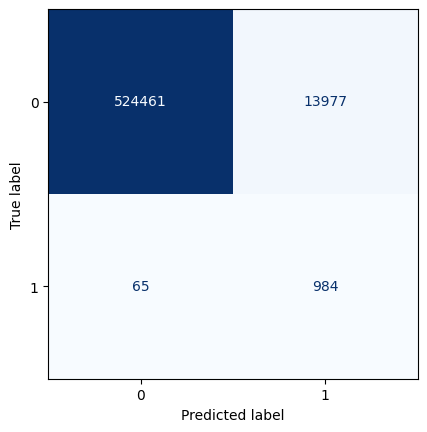

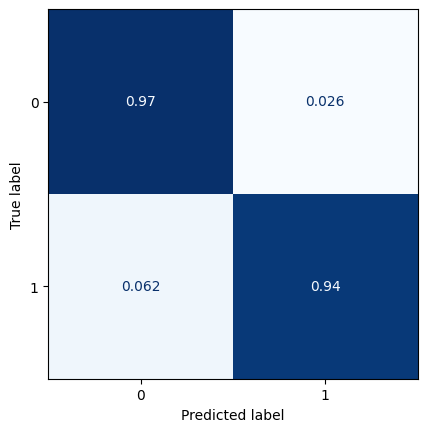

In [45]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


## More Layers

In [23]:
model = Sequential()
model.add(layers.Input(shape=(9, 9, 8)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 8)           584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 16)          1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 144)               0         
                                                                 
 dense (Dense)            

2023-01-30 10:05:31.789831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-30 10:05:31.791550: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-01-30 10:05:42.027234: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-30 10:05:42.255204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.2699

2023-01-30 10:06:08.240435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 68s 661ms/step - loss: 0.2699 - val_loss: 0.1422
Epoch 2/100
103/103 [==============================] - 45s 446ms/step - loss: 0.1348 - val_loss: 0.1569
Epoch 3/100
103/103 [==============================] - 43s 424ms/step - loss: 0.1133 - val_loss: 0.1751
Epoch 4/100
103/103 [==============================] - 42s 415ms/step - loss: 0.1019 - val_loss: 0.1303
Epoch 5/100
103/103 [==============================] - 43s 418ms/step - loss: 0.0944 - val_loss: 0.1187
Epoch 6/100
103/103 [==============================] - 45s 439ms/step - loss: 0.0898 - val_loss: 0.1987
Epoch 7/100
103/103 [==============================] - 45s 441ms/step - loss: 0.0885 - val_loss: 0.2186
Epoch 8/100
103/103 [==============================] - 46s 449ms/step - loss: 0.0779 - val_loss: 0.1737
Epoch 9/100
103/103 [==============================] - 43s 420ms/step - loss: 0.0732 - val_loss: 0.1017
Epoch 10/100
103/103 [==============================] - 44s 433ms/step - los

2023-01-30 10:33:29.684085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 24s 1ms/step


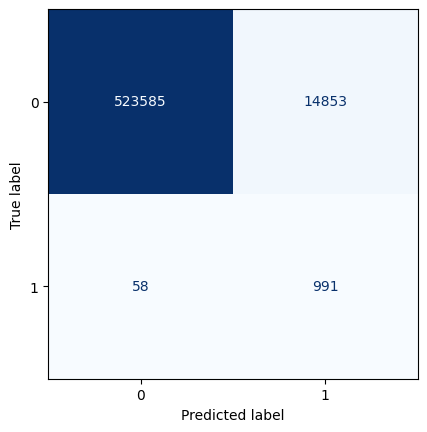

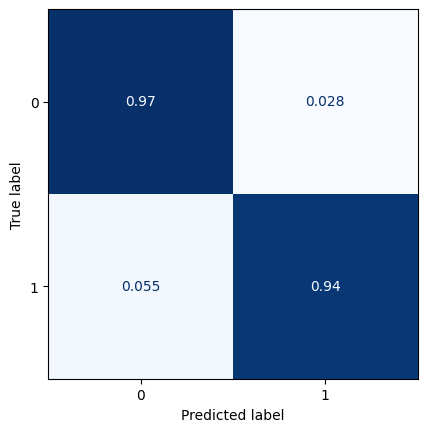

In [25]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


## Larger kernel

In [28]:
model = Sequential()
model.add(layers.Input(shape=(9, 9, 8)))

model.add(layers.Conv2D(8, (5,5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3,3), padding='same'))

model.add(layers.Conv2D(16, (5,5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3,3), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 9, 9, 8)           1608      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 8)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 16)          3216      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 16)               

In [29]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-01-30 10:42:58.272301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.2576

2023-01-30 10:43:22.823186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 71s 693ms/step - loss: 0.2576 - val_loss: 0.2225
Epoch 2/100
103/103 [==============================] - 49s 474ms/step - loss: 0.1301 - val_loss: 0.1107
Epoch 3/100
103/103 [==============================] - 49s 481ms/step - loss: 0.1175 - val_loss: 0.1321
Epoch 4/100
103/103 [==============================] - 49s 485ms/step - loss: 0.0991 - val_loss: 0.1273
Epoch 5/100
103/103 [==============================] - 49s 482ms/step - loss: 0.0879 - val_loss: 0.1454
Epoch 6/100
103/103 [==============================] - 49s 482ms/step - loss: 0.0754 - val_loss: 0.1076
Epoch 7/100
103/103 [==============================] - 49s 478ms/step - loss: 0.0764 - val_loss: 0.2058
Epoch 8/100
103/103 [==============================] - 49s 479ms/step - loss: 0.0619 - val_loss: 0.1259
Epoch 9/100
103/103 [==============================] - 49s 478ms/step - loss: 0.0521 - val_loss: 0.1980
Epoch 10/100
103/103 [==============================] - 49s 476ms/step - los

2023-01-30 11:10:21.548497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 26s 1ms/step


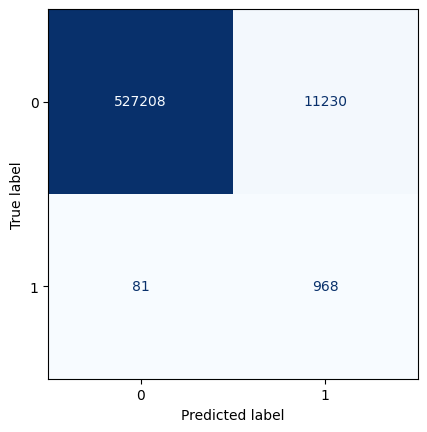

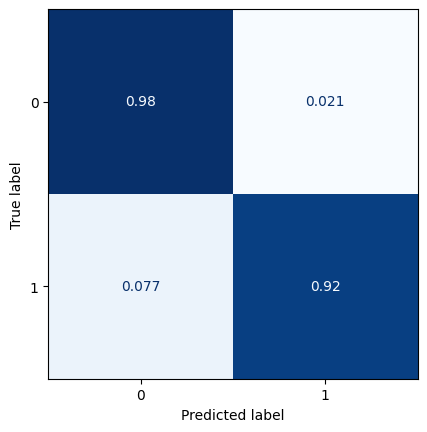

In [30]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


## More conv layers

In [32]:
model = Sequential()
model.add(layers.Input(shape=(9, 9, 8)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 9, 9, 8)           584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 5, 16)          1168      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 32)        

In [33]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-01-30 17:23:43.770284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.2578

2023-01-30 17:28:45.588374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 354s 3s/step - loss: 0.2578 - val_loss: 0.1928
Epoch 2/100
103/103 [==============================] - 51s 492ms/step - loss: 0.1244 - val_loss: 0.1900
Epoch 3/100
103/103 [==============================] - 50s 486ms/step - loss: 0.1134 - val_loss: 0.1775
Epoch 4/100
103/103 [==============================] - 51s 499ms/step - loss: 0.1004 - val_loss: 0.0810
Epoch 5/100
103/103 [==============================] - 51s 499ms/step - loss: 0.0896 - val_loss: 0.2275
Epoch 6/100
103/103 [==============================] - 50s 492ms/step - loss: 0.0806 - val_loss: 0.2064
Epoch 7/100
103/103 [==============================] - 51s 498ms/step - loss: 0.0825 - val_loss: 0.0742
Epoch 8/100
103/103 [==============================] - 50s 489ms/step - loss: 0.0685 - val_loss: 0.1078
Epoch 9/100
103/103 [==============================] - 50s 493ms/step - loss: 0.0671 - val_loss: 0.1802
Epoch 10/100
103/103 [==============================] - 51s 503ms/step - loss:

2023-01-30 17:55:11.719136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 32s 2ms/step


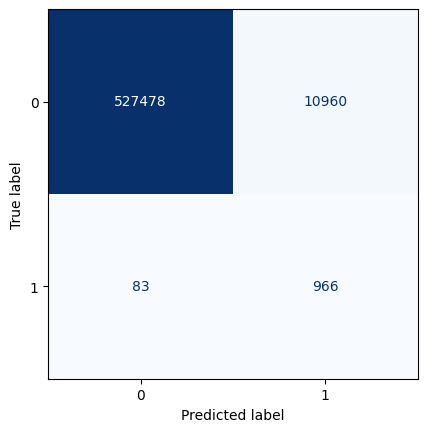

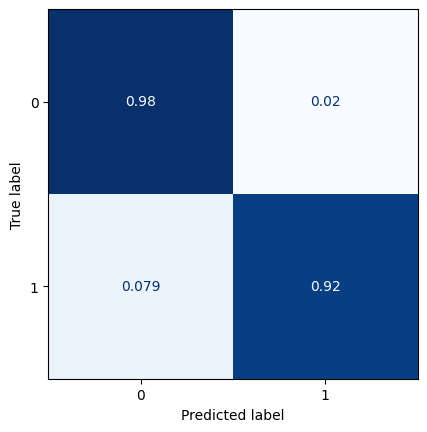

In [34]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


## more conv layers, less parameters

In [81]:
model = Sequential()
model.add(layers.Input(shape=(9, 9, 8)))

model.add(layers.Conv2D(4, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(12, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(4, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 9, 9, 4)           292       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 5, 5, 8)           296       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 3, 3, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 12)          876       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 2, 2, 12)       

In [82]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-02-15 16:46:28.175137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.3829

2023-02-15 16:50:31.105358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 301s 3s/step - loss: 0.3829 - val_loss: 0.1638
Epoch 2/100
103/103 [==============================] - 59s 573ms/step - loss: 0.1562 - val_loss: 0.0795
Epoch 3/100
103/103 [==============================] - 58s 566ms/step - loss: 0.1359 - val_loss: 0.1145
Epoch 4/100
103/103 [==============================] - 57s 554ms/step - loss: 0.1221 - val_loss: 0.2117
Epoch 5/100
103/103 [==============================] - 58s 568ms/step - loss: 0.1148 - val_loss: 0.1072
Epoch 6/100
103/103 [==============================] - 56s 545ms/step - loss: 0.1063 - val_loss: 0.1345
Epoch 7/100
103/103 [==============================] - 56s 548ms/step - loss: 0.0994 - val_loss: 0.0960
Epoch 8/100
103/103 [==============================] - 55s 539ms/step - loss: 0.0976 - val_loss: 0.1129
Epoch 9/100
103/103 [==============================] - 54s 524ms/step - loss: 0.0921 - val_loss: 0.1313
Epoch 10/100
103/103 [==============================] - 54s 529ms/step - loss:

2023-02-15 17:20:47.866423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 34s 2ms/step


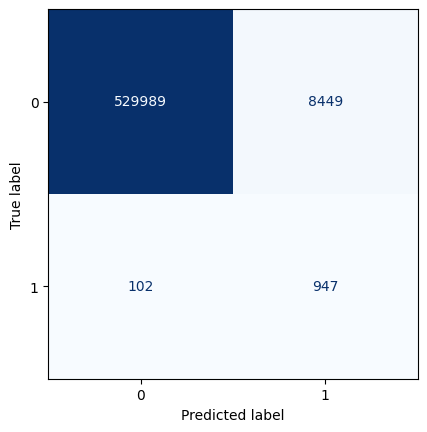

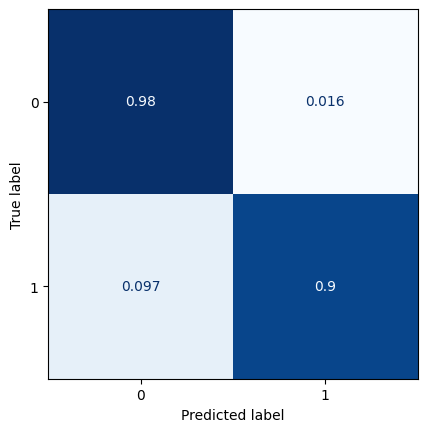

In [83]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


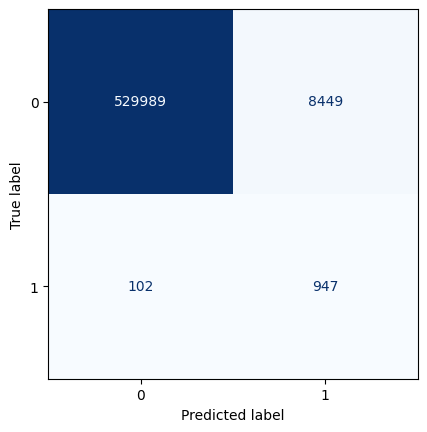

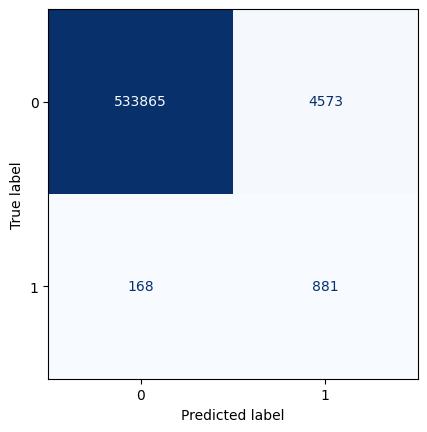

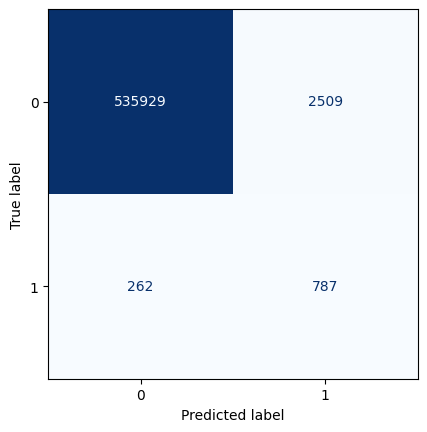

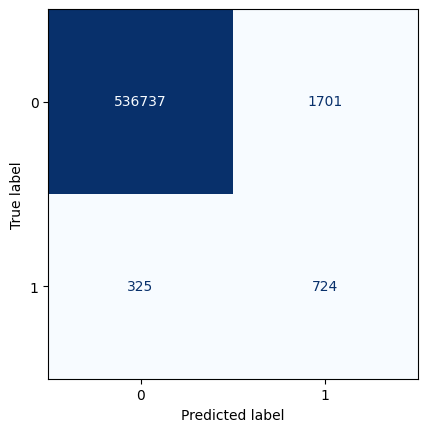

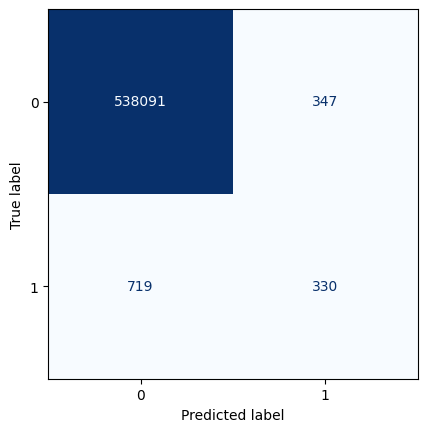

In [90]:
ranges = [0.5,0.75,0.9,0.95,0.9972]

#t = model.predict(test_images)

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)
    
    # confusion matrix with threshold on 0.5 
    ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    #ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
  

In [59]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='latitude', columns='longitude')[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images

In [61]:
test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv').drop(columns=['Unnamed: 0'])
train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv').drop(columns=['Unnamed: 0'])
val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv').drop(columns=['Unnamed: 0'])
y_train = train.loc[:,['Real_tom_lsm','latitude','longitude','time']]
y_val = val.loc[:,['Real_tom_lsm','latitude','longitude','time']]
y_test = test.loc[:,['Real_tom_lsm','latitude','longitude','time']]

In [62]:
variables = [ 'Real_tom_lsm']
y_test_img = extract_images(y_test, variables, verbose=True)
print(y_test_img.shape)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
(1431, 13, 29, 1)


In [63]:
y_test['prediction'] = t
variables = [ 'prediction']
y_test_img_preds = extract_images(y_test, variables, verbose=True)
print(y_test_img.shape)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
(1431, 13, 29, 1)


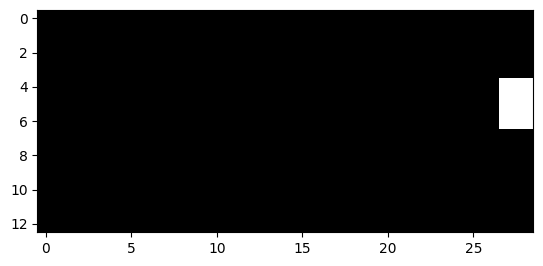

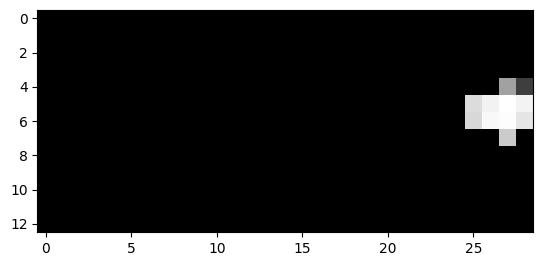

In [69]:
plt.figure()
plt.imshow(y_test_img[1212], cmap = "gray", vmin=0, vmax=1)
plt.show()
plt.imshow(y_test_img_preds[1212], vmin=0.99, vmax=1, cmap = "gray")
plt.show()

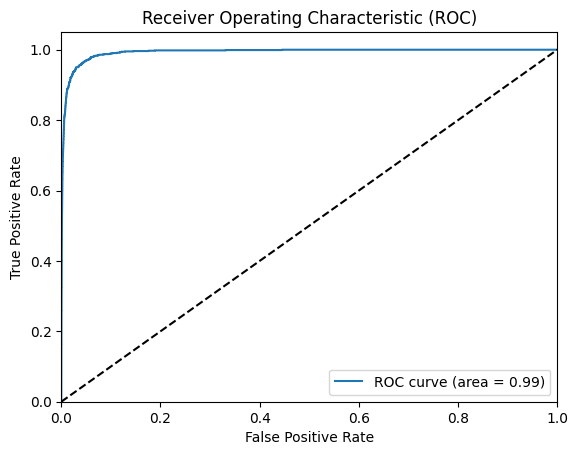

In [86]:
plot_roc(t,test_target)

In [76]:
import pickle
with open('/Users/paolo/Documents/TC_old/data/CNN_on_centers_model.pickle', 'wb') as handle:
    pickle.dump(model, handle)

INFO:tensorflow:Assets written to: ram://5fda16e1-f4e0-4fc3-ae97-701423912b0f/assets


INFO:tensorflow:Assets written to: ram://5fda16e1-f4e0-4fc3-ae97-701423912b0f/assets


In [87]:
with open('/Users/paolo/Documents/TC_old/data/CNN_on_centers_model.pickle', 'rb') as f:
    CNN_on_centers_model = pickle.load(f)

In [77]:
import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")

from aux import compute_cyclones

y_test['target_reshaped'] = test_target
y_test['predictions'] = classes

cyclones_real = compute_cyclones(y_test[y_test.target_reshaped==1],2.5)

cyclones_predicted = compute_cyclones(y_test[y_test.predictions==1],2.5)


/Users/paolo/Documents/TC/Paolo/scripts/aux.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key']=df.apply(lambda x: [x.latitude,x.longitude,x.time], axis=1)
/Users/paolo/Documents/TC/Paolo/scripts/aux.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key']=df.apply(lambda x: [x.latitude,x.longitude,x.time], axis=1)


In [78]:
TC_founds = 0 
    
for TC in cyclones_real:
    found = 0 
    for point in TC:
        reduced = y_test[(y_test.predictions==1) & (y_test.time==point[2]) & (y_test.latitude==point[0]) & (y_test.longitude==point[1])]
        if reduced.shape[0]>=1:
            found = 1
    if found == 1: TC_founds+=1
        

In [79]:
print(f'Number of test TCs: {len(cyclones_real)}\n')
print(f'Number of test TCs correctly predicted: {TC_founds}\n')
print(f'Number of test TCs predicted, correctly or not: {len(cyclones_predicted)}\n')
print(f'Number of test TCs predicted but not happening: {len(cyclones_predicted)-TC_founds}\n')


Number of test TCs: 189

Number of test TCs correctly predicted: 179

Number of test TCs predicted, correctly or not: 476

Number of test TCs predicted but not happening: 297



In [80]:
TC_founds = 0 
    
for TC in cyclones_predicted:
    found = 0 
    for point in TC:
        reduced = y_test[(y_test.target_reshaped==1) & (y_test.time==point[2]) & (y_test.latitude==point[0]) & (y_test.longitude==point[1])]
        if reduced.shape[0]>=1:
            found = 1
    if found == 1: TC_founds+=1


2023-02-15 17:34:35.724054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 47s 3ms/step


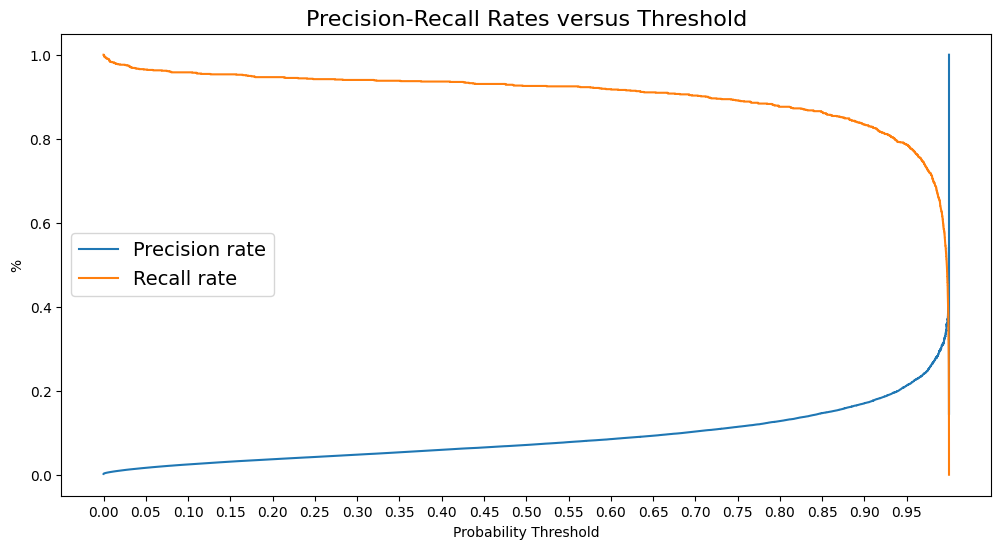

In [88]:
res = CNN_on_centers_model.predict(test_images)

from sklearn.metrics import precision_recall_curve

prec,rec,thr = precision_recall_curve(test_target,res)

import seaborn as sns

thr = np.append(thr, 1) 
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(thr, prec, color=sns.color_palette()[0])
ax.plot(thr, rec, color=sns.color_palette()[1])
ax.legend(('Precision rate', 'Recall rate'), fontsize=14)

ax.set_title("Precision-Recall Rates versus Threshold", fontsize=16)
ax.set_xlabel('Probability Threshold')
ax.xaxis.set_ticks(np.arange(0.00, 1.00, 0.05))
ax.set_ylabel('%');

In [89]:
def f1_threshold(precision, recall):
    numer = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numer, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = thr[np.argmax(f1_scores)]
    
    print("Maximum F1 score: {:0.4f}".format(max_f1))
    print("Optimal probability threshold: {:0.4f}".format(max_f1_thresh))
    return max_f1_thresh

threshold = f1_threshold(prec, rec)


Maximum F1 score: 0.4196
Optimal probability threshold: 0.9972


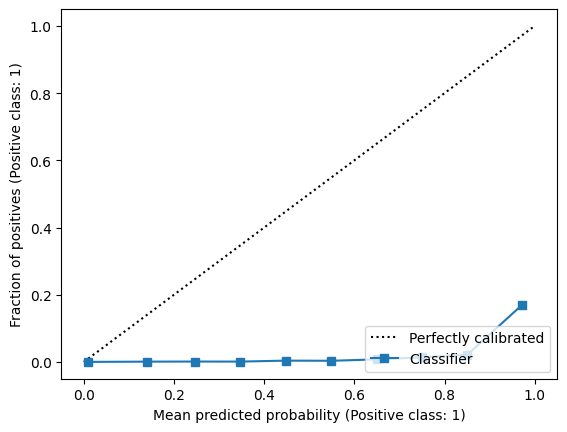

In [103]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(test_target, res, n_bins=10)


## Less parameters, less layers

In [24]:
model = Sequential()
model.add(layers.Input(shape=(9, 9, 8)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
#model.add(layers.Dense(1, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 9, 9, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-02-08 16:40:16.359128: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-08 16:40:16.561899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.4266

2023-02-08 16:41:30.907064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 117s 1s/step - loss: 0.4266 - val_loss: 0.2738
Epoch 2/100
103/103 [==============================] - 45s 438ms/step - loss: 0.2004 - val_loss: 0.1648
Epoch 3/100
103/103 [==============================] - 47s 458ms/step - loss: 0.1518 - val_loss: 0.1405
Epoch 4/100
103/103 [==============================] - 46s 455ms/step - loss: 0.1355 - val_loss: 0.1389
Epoch 5/100
103/103 [==============================] - 47s 460ms/step - loss: 0.1281 - val_loss: 0.1338
Epoch 6/100
103/103 [==============================] - 46s 452ms/step - loss: 0.1187 - val_loss: 0.1293
Epoch 7/100
103/103 [==============================] - 47s 456ms/step - loss: 0.1136 - val_loss: 0.1030
Epoch 8/100
103/103 [==============================] - 47s 458ms/step - loss: 0.1105 - val_loss: 0.1193
Epoch 9/100
103/103 [==============================] - 46s 451ms/step - loss: 0.1047 - val_loss: 0.1472
Epoch 10/100
103/103 [==============================] - 47s 456ms/step - loss:

    1/16859 [..............................] - ETA: 1:22:18

2023-02-08 17:07:21.039548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 23s 1ms/step


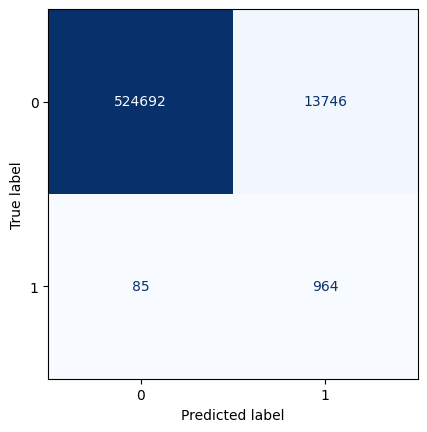

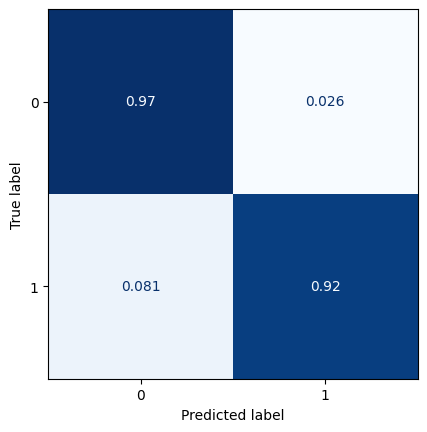

In [26]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


## More Conv layers

In [28]:
model = Sequential()
model.add(layers.Input(shape=(9, 9, 8)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
#model.add(layers.Dense(1, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 9, 9, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 8)           584       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 8)          0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 72)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [29]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-02-08 17:08:55.731098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.3693

2023-02-08 17:09:40.894232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 93s 908ms/step - loss: 0.3693 - val_loss: 0.2346
Epoch 2/100
103/103 [==============================] - 50s 485ms/step - loss: 0.1699 - val_loss: 0.1463
Epoch 3/100
103/103 [==============================] - 49s 483ms/step - loss: 0.1420 - val_loss: 0.1036
Epoch 4/100
103/103 [==============================] - 50s 486ms/step - loss: 0.1294 - val_loss: 0.1761
Epoch 5/100
103/103 [==============================] - 48s 474ms/step - loss: 0.1212 - val_loss: 0.1272
Epoch 6/100
103/103 [==============================] - 46s 452ms/step - loss: 0.1137 - val_loss: 0.1301
Epoch 7/100
103/103 [==============================] - 49s 481ms/step - loss: 0.1100 - val_loss: 0.0950
Epoch 8/100
103/103 [==============================] - 49s 479ms/step - loss: 0.1049 - val_loss: 0.1401
Epoch 9/100
103/103 [==============================] - 49s 477ms/step - loss: 0.0998 - val_loss: 0.1401
Epoch 10/100
103/103 [==============================] - 50s 486ms/step - los

    1/16859 [..............................] - ETA: 1:31:48

2023-02-08 17:36:53.794089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 24s 1ms/step


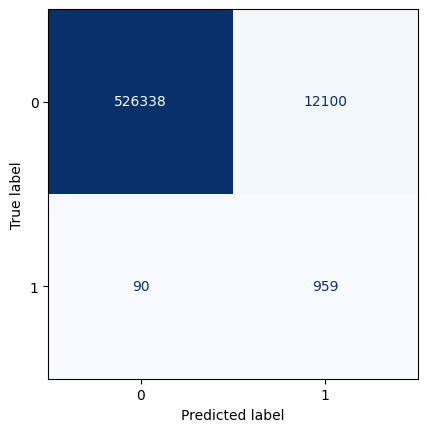

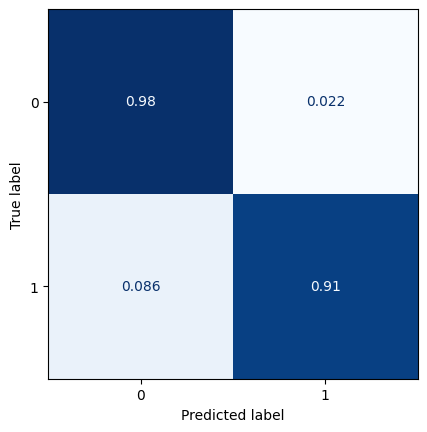

In [30]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


In [34]:
model = Sequential()
model.add(layers.Input(shape=(9, 9, 8)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(4, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 9, 9, 8)           584       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 200)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 804       
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,393
Trainable params: 1,393
Non-trainable params: 0
____________________________________________________

In [35]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-02-08 17:45:55.248073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.5056

2023-02-08 17:46:22.126299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 76s 744ms/step - loss: 0.5056 - val_loss: 0.3070
Epoch 2/100
103/103 [==============================] - 51s 495ms/step - loss: 0.2084 - val_loss: 0.1489
Epoch 3/100
103/103 [==============================] - 51s 496ms/step - loss: 0.1580 - val_loss: 0.1306
Epoch 4/100
103/103 [==============================] - 51s 497ms/step - loss: 0.1419 - val_loss: 0.1668
Epoch 5/100
103/103 [==============================] - 51s 500ms/step - loss: 0.1273 - val_loss: 0.1423
Epoch 6/100
103/103 [==============================] - 51s 496ms/step - loss: 0.1213 - val_loss: 0.0991
Epoch 7/100
103/103 [==============================] - 50s 491ms/step - loss: 0.1149 - val_loss: 0.1515
Epoch 8/100
103/103 [==============================] - 51s 496ms/step - loss: 0.1099 - val_loss: 0.1299
Epoch 9/100
103/103 [==============================] - 51s 502ms/step - loss: 0.1030 - val_loss: 0.1005
Epoch 10/100
103/103 [==============================] - 51s 500ms/step - los

    7/16859 [..............................] - ETA: 2:21   

2023-02-08 18:04:37.787036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 25s 1ms/step


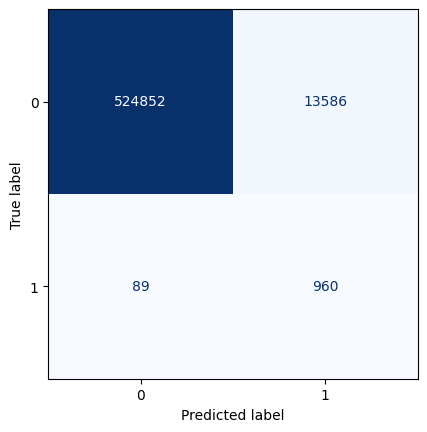

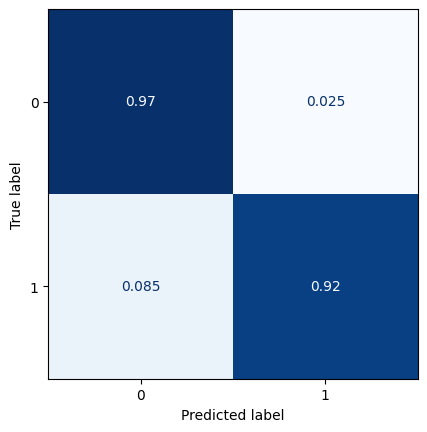

In [36]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


In [37]:
model = Sequential()
model.add(layers.Input(shape=(9, 9, 8)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(4, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 9, 9, 8)           584       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 8)           584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 8)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 72)                0         
                                                                 
 dense_11 (Dense)            (None, 4)                

In [38]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100
  1/103 [..............................] - ETA: 32s - loss: 0.6689

2023-02-08 18:05:39.846380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.3980

2023-02-08 18:06:01.044556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 72s 701ms/step - loss: 0.3980 - val_loss: 0.2748
Epoch 2/100
103/103 [==============================] - 53s 518ms/step - loss: 0.1730 - val_loss: 0.2058
Epoch 3/100
103/103 [==============================] - 52s 514ms/step - loss: 0.1399 - val_loss: 0.1337
Epoch 4/100
103/103 [==============================] - 52s 507ms/step - loss: 0.1234 - val_loss: 0.1336
Epoch 5/100
103/103 [==============================] - 51s 503ms/step - loss: 0.1151 - val_loss: 0.2239
Epoch 6/100
103/103 [==============================] - 51s 497ms/step - loss: 0.1106 - val_loss: 0.1475
Epoch 7/100
103/103 [==============================] - 49s 482ms/step - loss: 0.1034 - val_loss: 0.1575
Epoch 8/100
103/103 [==============================] - 50s 487ms/step - loss: 0.0982 - val_loss: 0.1244
Epoch 9/100
103/103 [==============================] - 52s 505ms/step - loss: 0.0971 - val_loss: 0.1956
Epoch 10/100
103/103 [==============================] - 52s 509ms/step - los

2023-02-08 18:33:53.450046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 25s 1ms/step


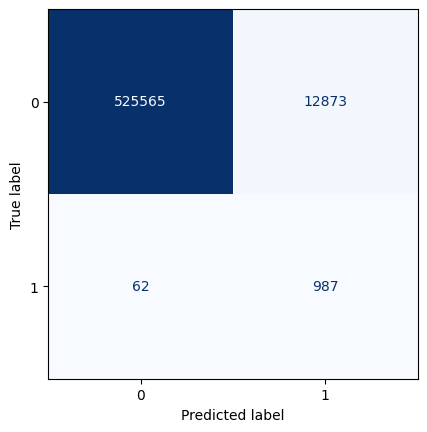

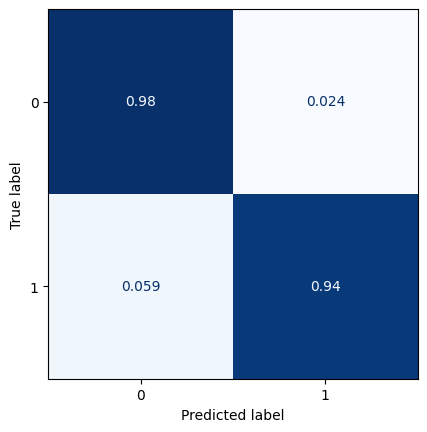

In [39]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


In [40]:
model = Sequential()
model.add(layers.Input(shape=(9, 9, 8)))

model.add(layers.Conv2D(4, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(4, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 9, 9, 4)           292       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 5, 5, 8)           296       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 3, 3, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 16)          1168      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 16)        

In [41]:
model.fit(train_images, train_target, validation_data=(val_images,val_target.values.reshape(-1,1)),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-02-08 18:34:21.806459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 0.3566

2023-02-08 18:34:43.913982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 78s 757ms/step - loss: 0.3566 - val_loss: 0.3068
Epoch 2/100
103/103 [==============================] - 55s 538ms/step - loss: 0.1689 - val_loss: 0.0997
Epoch 3/100
103/103 [==============================] - 56s 544ms/step - loss: 0.1445 - val_loss: 0.1778
Epoch 4/100
103/103 [==============================] - 57s 555ms/step - loss: 0.1343 - val_loss: 0.1471
Epoch 5/100
103/103 [==============================] - 56s 550ms/step - loss: 0.1236 - val_loss: 0.0866
Epoch 6/100
103/103 [==============================] - 56s 552ms/step - loss: 0.1198 - val_loss: 0.1183
Epoch 7/100
103/103 [==============================] - 56s 546ms/step - loss: 0.1111 - val_loss: 0.1641
Epoch 8/100
103/103 [==============================] - 56s 551ms/step - loss: 0.1059 - val_loss: 0.1110
Epoch 9/100
103/103 [==============================] - 57s 560ms/step - loss: 0.1015 - val_loss: 0.0946
Epoch 10/100
103/103 [==============================] - 56s 552ms/step - los

2023-02-08 19:08:03.261614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 32s 2ms/step


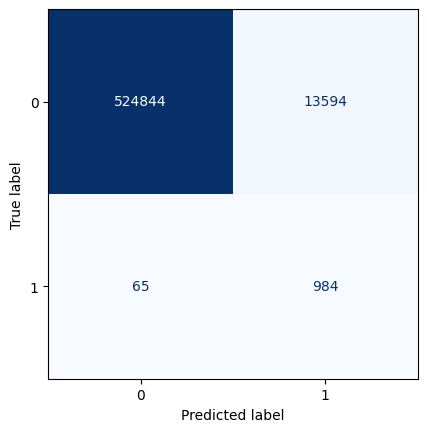

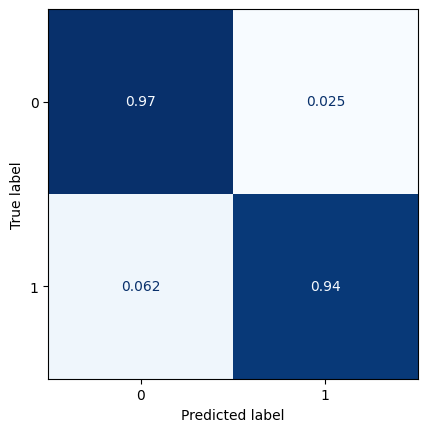

In [42]:
t = model.predict(test_images)

classes = []
for i in t.reshape(-1,1):
    if i<=0.5: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.5 
ConfusionMatrixDisplay(confusion_matrix(test_target, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(test_target, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
